# Python & Data Science practical exercises 4

## Exploratory data analysis

Follow the instructions to complete each of these tasks. This set of exercises focusses on exploring data using the methods we have learnt so far. Do not worry if you do not complete them all in the timetabled practical session.

**Questions marked with a * are extra challenging**

This is not assessed but will help you gain practical experience for the exam and coursework.

*Feel free to work on them in any order, and focus on the ones you find most challening or interesting!*

In [1]:
%matplotlib inline
# You can also use %matplotlib notebook to get an interactive display
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

## 1.1

Load the bikes.csv file into a pandas data frame. Using the DataFrame method isnull(), you can produce a DataFrame where each value is either True if the value is  missing, or False if it is present.

Produce a count of the number of missing values in each column in the DataFrame.

*Tip - the sum() method treats True and False values as 1 and 0 respectively https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html*

In [2]:
bikedata = pd.read_csv('bikes.csv')
bikeMissing = pd.DataFrame.isnull(bikedata)
countMissing = pd.DataFrame.sum(bikeMissing)
bikedata

,Rental ID,Start Time,End Time,Bike ID,Duration in Seconds,Start Station ID,Start Station Name,End Station ID,End Station Name,User Type,Member Gender,Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048.0,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,2137.0,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NaN,NaN
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1108158,23479383,2019-06-30 23:58:00,2019-07-01 00:20:22,4573,1342.0,206,Halsted St & Archer Ave,206,Halsted St & Archer Ave,Customer,NaN,NaN
1108159,23479384,2019-06-30 23:58:04,2019-07-01 00:14:17,6301,973.0,199,Wabash Ave & Grand Ave,338,Calumet Ave & 18th St,Subscriber,Male,1980.0
1108160,23479385,2019-06-30 23:58:20,2019-07-01 00:25:51,4472,1651.0,319,Greenview Ave & Diversey Pkwy,337,Clark St & Chicago Ave,Subscriber,Female,1991.0
1108161,23479386,2019-06-30 23:58:52,2019-07-01 00:11:24,5021,752.0,226,Racine Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1992.0


## 1.2

Think of a sensible way of removing the missing values and use this to create a new DataFrame with no missing values. You can use the copy() method to duplicate a DataFrame before modifying it.

In [3]:
bikedata_copy = bikedata.copy()
bikedata_copy['Member Birthday Year'] = bikedata_copy['Member Birthday Year'].fillna(round(bikedata['Member Birthday Year'].mean()))
bikedata_copy['Member Gender'].value_counts()
bikedata_copy['Member Gender'] = bikedata_copy['Member Gender'].fillna('Male')#Fill NA with mean which is 'Male'
bikedata_copy

,Rental ID,Start Time,End Time,Bike ID,Duration in Seconds,Start Station ID,Start Station Name,End Station ID,End Station Name,User Type,Member Gender,Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048.0,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,2137.0,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,Male,1984.0
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1108158,23479383,2019-06-30 23:58:00,2019-07-01 00:20:22,4573,1342.0,206,Halsted St & Archer Ave,206,Halsted St & Archer Ave,Customer,Male,1984.0
1108159,23479384,2019-06-30 23:58:04,2019-07-01 00:14:17,6301,973.0,199,Wabash Ave & Grand Ave,338,Calumet Ave & 18th St,Subscriber,Male,1980.0
1108160,23479385,2019-06-30 23:58:20,2019-07-01 00:25:51,4472,1651.0,319,Greenview Ave & Diversey Pkwy,337,Clark St & Chicago Ave,Subscriber,Female,1991.0
1108161,23479386,2019-06-30 23:58:52,2019-07-01 00:11:24,5021,752.0,226,Racine Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1992.0


## 1.3

Use the describe() method to calculate statistics of the columns in the data frame. Is there anything strange about the values in a column?

In [4]:
bikedata_copy.describe()
#Bad Vaules:
#Bike Duration Max is 55 days long
#Min Member Birthday Year is 1759

,Rental ID,Bike ID,Duration in Seconds,Start Station ID,End Station ID,Member Birthday Year
count,1.108163e+06,1.108163e+06,1.108163e+06,1.108163e+06,1.108163e+06,1.108163e+06
mean,2.282986e+07,3.398800e+03,1.327290e+03,2.003032e+02,2.012671e+02,1.983949e+03
std,3.753977e+05,1.907732e+03,1.339378e+04,1.548459e+02,1.550123e+02,9.877756e+00
min,2.217853e+07,1.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,1.759000e+03
25%,2.250507e+07,1.738000e+03,4.260000e+02,7.700000e+01,7.700000e+01,1.981000e+03
50%,2.283116e+07,3.471000e+03,7.420000e+02,1.740000e+02,1.740000e+02,1.985000e+03
75%,2.315450e+07,5.080000e+03,1.347000e+03,2.890000e+02,2.900000e+02,1.991000e+03
max,2.347939e+07,6.471000e+03,4.757640e+06,6.690000e+02,6.690000e+02,2.014000e+03


## 1.4

Create a plot showing the distribution of journey durations for the two different user types. You may find it useful to remove outliers from the plot or adjust the range to make it clearer.

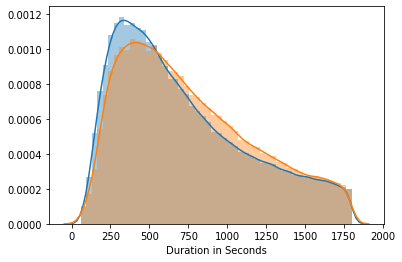

In [5]:
#bikedata_copy.columns
holdx = bikedata_copy[bikedata_copy['Member Gender'] == 'Male']
holdx = holdx[holdx['Duration in Seconds'] < 1800]#30 minutes, there are values that are anomolies in data for Duration in Sec
sns.distplot(holdx['Duration in Seconds'])
holdx = bikedata_copy[bikedata_copy['Member Gender'] == 'Female']
holdx = holdx[holdx['Duration in Seconds'] < 1800]
sns.distplot(holdx['Duration in Seconds'])
#Female and Male have similar distribution in duration in seconds spent with bike. Female tend to be a slightly longer

## 1.5

Convert the Start Time and End Time columns to pandas datetime objects. You can do this using the pd.to_datetime method on those columns.

Create a new column in the data frame that gives the day of the week the journey was started on. You can extract the day of the week from a datetime object using the .dayofweek attribue, and use the apply method of a column in a DataFrame to apply a function to each value in the column.

In [6]:
bikedata_copy['Start Time'] = pd.to_datetime(bikedata_copy['Start Time'])
bikedata_copy['End Time'] = pd.to_datetime(bikedata_copy['End Time'])
bikedata_copy['Start Day'] = bikedata_copy['Start Time'].dt.dayofweek#Integers represent days
#bikedata_copy['Start Day'] = bikedata_copy['Start Time'].dt.dayofweek()#Found an example using .dt.day_name() to get string name
f = lambda x: x +1
bikedata_copy['Start Day'].apply(f)#Apply a function, Which function? This is the basis for apply, just need to pass a function as .apply() arg
#For example I added 1 to every week day so that it starts from 1 and ends at 7 rather than 0 to 6 (this will not be saved to dataframe)
bikedata_copy.head()#Comment out to see .apply() working

,Rental ID,Start Time,End Time,Bike ID,Duration in Seconds,Start Station ID,Start Station Name,End Station ID,End Station Name,User Type,Member Gender,Member Birthday Year,Start Day
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048.0,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,0
2,22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,2137.0,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,Male,1984.0,0
3,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,0
4,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,0


## 1.6

Create a new column in the data frame giving the (approximate) age in years of the user for each journey. Use this to produce a plot comparing the distribution of ages of users on each different week day.

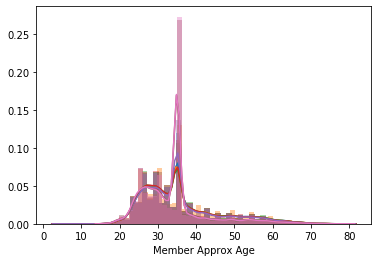

In [7]:
bikedata_copy['Member Approx Age'] = 2019 - bikedata_copy['Member Birthday Year']#Current year - Birth year (could have also done this with an .apply() func)
#distribution of age for each day, Removed age anomolies max age 80
sns.distplot(bikedata_copy[bikedata_copy['Start Day'] == 0][bikedata_copy[bikedata_copy['Start Day'] == 0]['Member Approx Age'] < 80]['Member Approx Age'])
sns.distplot(bikedata_copy[bikedata_copy['Start Day'] == 1][bikedata_copy[bikedata_copy['Start Day'] == 1]['Member Approx Age'] < 80]['Member Approx Age'])
sns.distplot(bikedata_copy[bikedata_copy['Start Day'] == 2][bikedata_copy[bikedata_copy['Start Day'] == 2]['Member Approx Age'] < 80]['Member Approx Age'])
sns.distplot(bikedata_copy[bikedata_copy['Start Day'] == 3][bikedata_copy[bikedata_copy['Start Day'] == 3]['Member Approx Age'] < 80]['Member Approx Age'])
sns.distplot(bikedata_copy[bikedata_copy['Start Day'] == 4][bikedata_copy[bikedata_copy['Start Day'] == 4]['Member Approx Age'] < 80]['Member Approx Age'])
sns.distplot(bikedata_copy[bikedata_copy['Start Day'] == 5][bikedata_copy[bikedata_copy['Start Day'] == 5]['Member Approx Age'] < 80]['Member Approx Age'])
sns.distplot(bikedata_copy[bikedata_copy['Start Day'] == 6][bikedata_copy[bikedata_copy['Start Day'] == 6]['Member Approx Age'] < 80]['Member Approx Age'])
#Graph is messy when together so run individually, most bike riders are just under 40 most riders are on Weekends

## 1.7

Investigate the numbers of journeys starting at each hour of the day. You can use the hour attribute of a pandas datetime object to extract the hour of the day from the starting times.

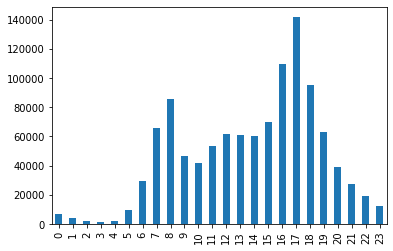

In [8]:
bikedata_copy['Start Time'].dt.hour.value_counts()#Without graph
bikedata_copy['Start Time'].dt.hour.value_counts().sort_index().plot(kind='bar')#With Bar Plot
#17:00 is the busiest

## 1.8*

Use the pandas cut() function to create a new column in the data frame that assigns an age range of the user for each journey. Use this new column to visualise the relationship between age group and duration of journeys.

You can find documentation on the cut function here - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html